Title
# House Price Prediction Using Linear Regression

This project predicts house prices based on property features such as square footage, number of bedrooms, bathrooms, and neighborhood. 
Machine learning regression techniques are used to learn patterns from historical housing data.

1. Problem Statement and Goal
## Problem Statement

The objective of this project is to predict house prices based on features such as square footage, number of bedrooms, bathrooms, and year built.

Accurate house price prediction helps buyers, sellers, and real estate companies estimate property value.

## Goal

The goal is to train a regression model that can predict house prices using housing features and evaluate its performance using MAE and RMSE.

2. Import Libraries

In [ ]:

# Import necessary libraries for data analysis, visualization, and machine learningimport pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Import machine learning tools from scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

3. Dataset Loading

## Dataset Loading

The dataset is uploaded and loaded using pandas. 
It contains housing features such as square footage, number of bedrooms, bathrooms, neighborhood, and price.

In [2]:
from google.colab import files
uploaded = files.upload()

Saving housing_price_dataset.csv to housing_price_dataset.csv


4. Data Exploration
Before training the model, we explore the dataset to understand its structure, data types, and statistical properties.

In [7]:
data = pd.read_csv("housing_price_dataset.csv")

data.head()

,SquareFeet,Bedrooms,Bathrooms,Neighborhood,YearBuilt,Price
0,2126,4,1,Rural,1969,215355.283618
1,2459,3,2,Rural,1980,195014.221626
2,1860,2,1,Suburb,1970,306891.012076
3,2294,2,1,Urban,1996,206786.787153
4,2130,5,2,Suburb,2001,272436.239065


In [ ]:
data.info()
data.describe()
# Check missing values
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   SquareFeet    50000 non-null  int64  
 1   Bedrooms      50000 non-null  int64  
 2   Bathrooms     50000 non-null  int64  
 3   Neighborhood  50000 non-null  object 
 4   YearBuilt     50000 non-null  int64  
 5   Price         50000 non-null  float64
dtypes: float64(1), int64(4), object(1)
memory usage: 2.3+ MB


,0
SquareFeet,0
Bedrooms,0
Bathrooms,0
Neighborhood,0
YearBuilt,0
Price,0


5. Data Preprocessing
Missing values are removed and categorical variables are converted to numerical values using one-hot encoding.

In [ ]:

data = data.dropna()

In [ ]:
# Separate features and target variable
X = data.drop('Price', axis=1)
y = data['Price']

In [ ]:
# Convert categorical variables to numerical values
X = pd.get_dummies(X, drop_first=True)

6. Train-Test Split

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

7. Model Training
A Linear Regression model is trained using the training dataset to learn the relationship between housing features and house prices.

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predict house prices using the test dataset
y_pred = model.predict(X_test)

8. Model Evaluation

In [ ]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("RMSE:", rmse)

MAE: 39430.16533829791
RMSE: 49358.376911191546


9. Visualization

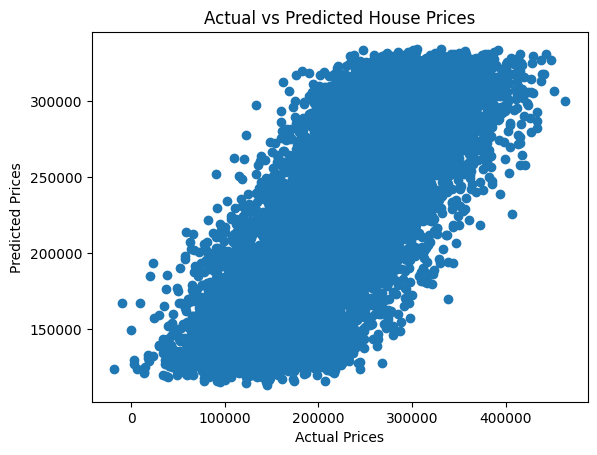

In [ ]:
# Scatter plot comparing actual vs predicted prices
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

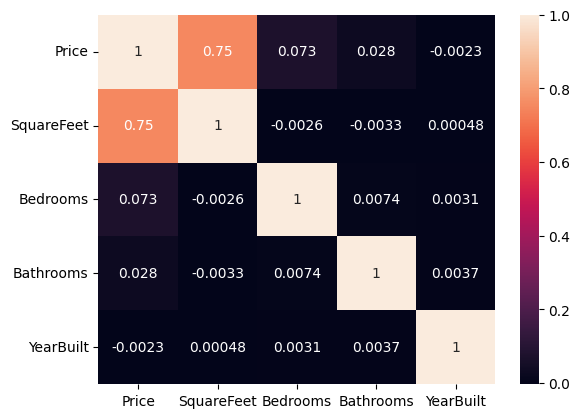

In [ ]:
# Correlation heatmap to analyze relationships between features
sns.heatmap(data[["Price", "SquareFeet", "Bedrooms", "Bathrooms", "YearBuilt"]].corr(), annot=True)
plt.show()

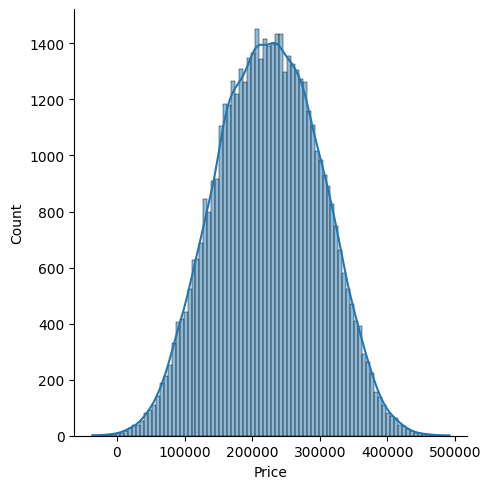

In [ ]:
# Distribution of house prices
sns.displot(data['Price'], kind='hist', kde=True)
plt.show()

10. Final Insights
The Linear Regression model successfully learns the relationship between house features and house prices.

The scatter plot shows that predicted prices follow the trend of actual prices, indicating the model captures the underlying pattern.

Evaluation metrics such as MAE and RMSE indicate the average prediction error of the model.

Features like square footage, number of bedrooms, and bathrooms show positive correlation with house prices.